# `Getting Tools Ready`
****

### `Data Analysis and Data Manupulation`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

### `Models For Classifier`

In [2]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### `Model Evaluation`

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

***
# `Exploring Our Data`
***

### `Load Data`

In [4]:
df = pd.read_csv('heart diseases.csv')

In [5]:
df.shape

(303, 14)

### `Data Exploration`

In [6]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [7]:
# Let's count how many targets of each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

****`Visculize it`****

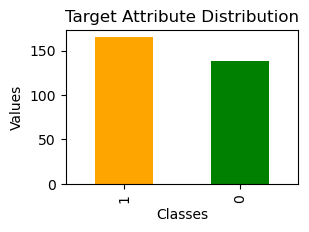

In [8]:
plt.subplots(figsize=(3,2))
df['target'].value_counts().plot(kind='bar',color=['orange','green'])
plt.title('Target Attribute Distribution')
plt.xlabel("Classes")
plt.ylabel('Values')
plt.show()

****`Info`****

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

****`Describe data`****

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***`Visculize it`***

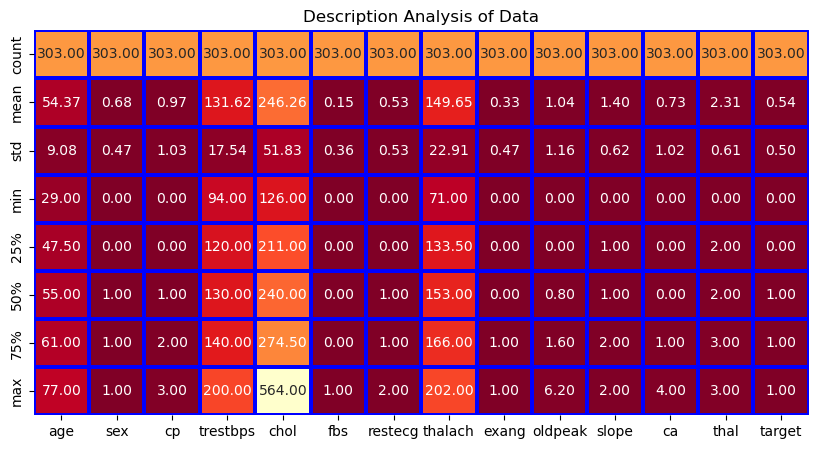

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe(),annot=True,linewidths=1.5,linecolor='blue',fmt='.2f',cbar=False,cmap="YlOrRd_r")
plt.title("Description Analysis of Data")
plt.show()

****`Sex Counts`****

In [13]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

****`Visculize it`****

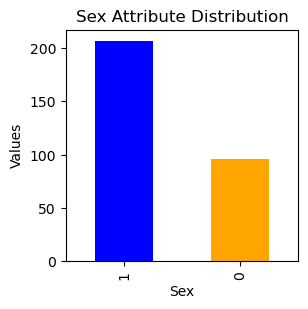

In [14]:
plt.subplots(figsize=(3,3))
df['sex'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.title('Sex Attribute Distribution')
plt.xlabel("Sex")
plt.ylabel('Values')
plt.show()

### `Compare Target Column with Sex Column`

In [15]:
cross_tab = pd.crosstab(df['target'],df['sex'])

In [16]:
cross_tab

sex,0,1
target,,
0,24,114
1,72,93


****`Visculize it`****

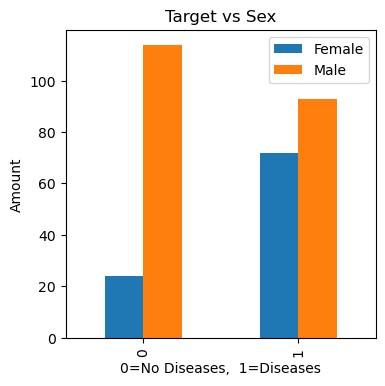

In [17]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',figsize=(4,4))
plt.title("Target vs Sex")
plt.xlabel("0=No Diseases,  1=Diseases")
plt.ylabel("Amount")
plt.legend(['Female','Male'])
plt.show()

### `Age vs Max Heart rate For Target`

In [18]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


****`Visculize it`****

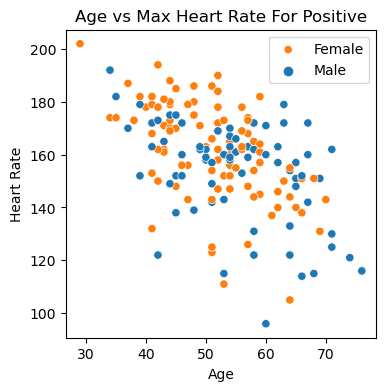

In [19]:
plt.figure(figsize=(4,4))
sns.scatterplot(df.age[df.target==1],df.thalach[df.target==1],hue=df['sex'])
plt.title("Age vs Max Heart Rate For Positive")
plt.xlabel('Age')
plt.ylabel("Heart Rate")
plt.legend(['Female','Male'])
plt.show()

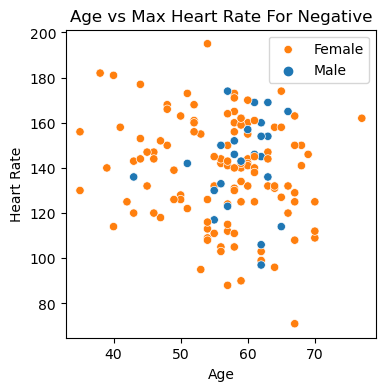

In [20]:
plt.figure(figsize=(4,4))
sns.scatterplot(df.age[df.target==0],df.thalach[df.target==0],hue=df['sex'])
plt.title("Age vs Max Heart Rate For Negative")
plt.xlabel('Age')
plt.ylabel("Heart Rate")
plt.legend(['Female','Male'])
plt.show()

***`Age Distribution`***

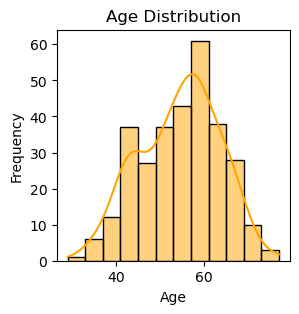

In [21]:
plt.figure(figsize=(3,3))
sns.histplot(df['age'],kde=True,color='orange')
plt.title("Age Distribution")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

### `cp vs Target`

In [22]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


****`Visculize it`****

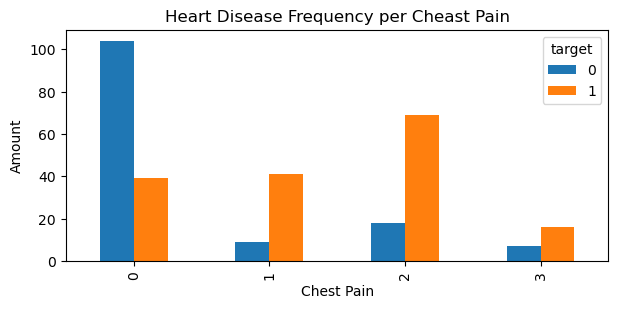

In [23]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(7,3))
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.title("Heart Disease Frequency per Cheast Pain")
plt.show()

## `Correlation b/w dependent and independent`

In [24]:
corr = df.corr()

In [25]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


***`Visculize it`***

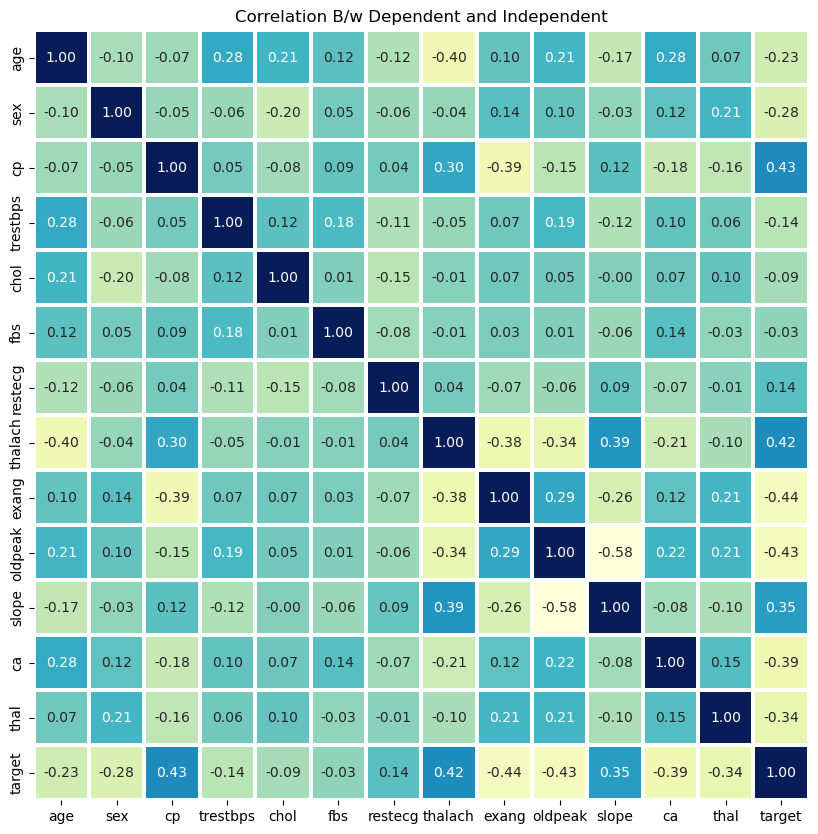

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=1.5,cbar=False,fmt='.2f', cmap='YlGnBu')
plt.title('Correlation B/w Dependent and Independent')
plt.show()

### `exang vs Target`
***As exang has negitve corelation with target, let's see it***

In [27]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


***`Visculize it`***

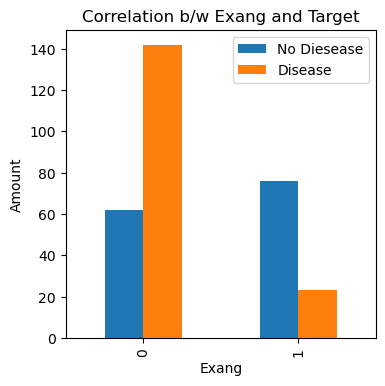

In [28]:
pd.crosstab(df.exang,df.target).plot(kind='bar',figsize=(4,4))
plt.title('Correlation b/w Exang and Target')
plt.xlabel("Exang")
plt.ylabel("Amount")
plt.legend(['No Diesease','Disease'])
plt.show()

***
# `Preparing Our Data For Machine Learning`
***

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


***`Split data into X and y`***

In [30]:
X = df.drop('target',axis=1)
y = df['target']

***`Split data into train and test`***

In [31]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### `Analyze x_train and y_train`

In [32]:
x_train.shape

(242, 13)

****`Count sex`****

In [33]:
x_train['sex'].value_counts()

1    159
0     83
Name: sex, dtype: int64

***`Visculize it`***

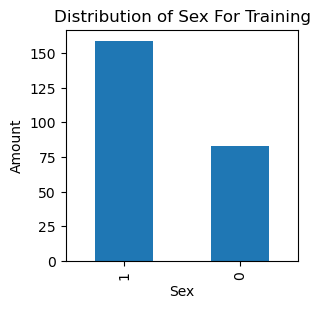

In [34]:
x_train['sex'].value_counts().plot(kind='bar',figsize=(3,3))
plt.title('Distribution of Sex For Training')
plt.xlabel("Sex")
plt.ylabel("Amount")
plt.show()

***`Count Target For Train`***

In [35]:
y_train.value_counts()

1    133
0    109
Name: target, dtype: int64

***`Visculize it`***

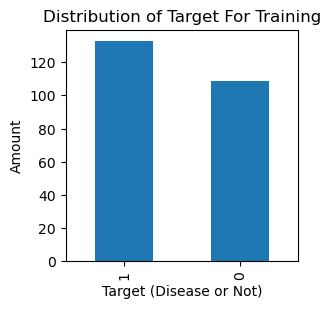

In [36]:
y_train.value_counts().plot(kind='bar',figsize=(3,3))
plt.title('Distribution of Target For Training')
plt.xlabel("Target (Disease or Not)")
plt.ylabel("Amount")
plt.show()

***`Analyze sex and target distribution`***

In [37]:
pd.crosstab(x_train['sex'],y_train)

target,0,1
sex,,
0,20,63
1,89,70


***`Visculize it`***

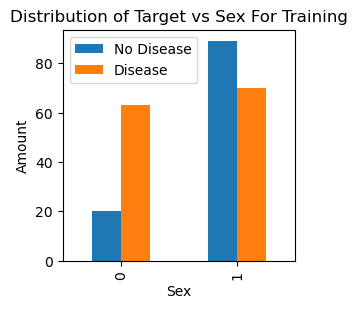

In [38]:
pd.crosstab(x_train['sex'],y_train).plot(kind='bar',figsize=(3,3))
plt.title('Distribution of Target vs Sex For Training')
plt.xlabel("Sex")
plt.ylabel("Amount")
plt.legend(['No Disease','Disease'])
plt.show()

### `Analyze x_test and y_test`
* Only Visculization

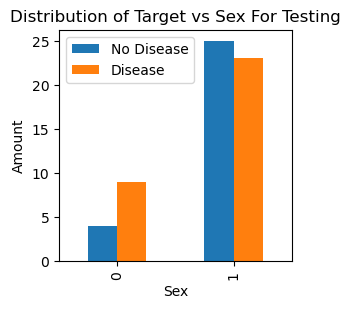

In [39]:
pd.crosstab(x_test['sex'],y_test).plot(kind='bar',figsize=(3,3))
plt.title('Distribution of Target vs Sex For Testing')
plt.xlabel("Sex")
plt.ylabel("Amount")
plt.legend(['No Disease','Disease'])
plt.show()

In [40]:
x_test['sex'].value_counts()

1    48
0    13
Name: sex, dtype: int64

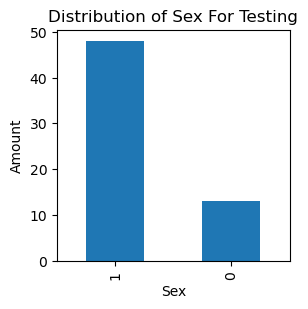

In [41]:
x_test['sex'].value_counts().plot(kind='bar',figsize=(3,3))
plt.title('Distribution of Sex For Testing')
plt.xlabel("Sex")
plt.ylabel("Amount")
plt.show()

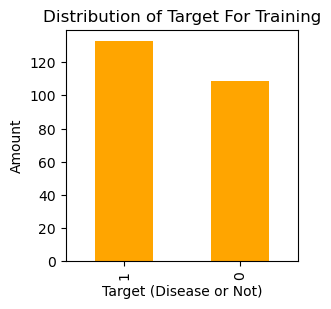

In [42]:
y_train.value_counts().plot(kind='bar',figsize=(3,3),color='orange')
plt.title('Distribution of Target For Training')
plt.xlabel("Target (Disease or Not)")
plt.ylabel("Amount")
plt.show()

***
# `Built Machine Learning Model`
***

***`Models`***

In [43]:
models = {
    'logisticRegression':LogisticRegression(max_iter=1000),
    'KNeighbord':KNeighborsClassifier(),
    'gbc':GradientBoostingClassifier(),
    'randomForest':RandomForestClassifier()
}

In [44]:
models

{'logisticRegression': LogisticRegression(max_iter=1000),
 'KNeighbord': KNeighborsClassifier(),
 'gbc': GradientBoostingClassifier(),
 'randomForest': RandomForestClassifier()}

***`Function to fit and score model`***

In [45]:
def fit_and_score(model, x_train, x_test, y_train, y_test):
    '''
    model: A dictionary of ml models
    x_train: training dataset
    '''
    np.random.seed(42)
    #Make a distionary to keep model score
    score = {}
    #Loop model and score it
    for name, model in model.items():
        model.fit(x_train,y_train)
        score[name]=model.score(x_test,y_test)
    return score

***`Call function`***

In [46]:
model_score = fit_and_score(models,x_train,x_test,y_train,y_test)

In [47]:
model_score

{'logisticRegression': 0.8688524590163934,
 'KNeighbord': 0.6885245901639344,
 'gbc': 0.7704918032786885,
 'randomForest': 0.8524590163934426}

***`Model Comparision`***

In [48]:
model_comp = pd.DataFrame(model_score,index=['Accuracy'])

In [49]:
model_comp

,logisticRegression,KNeighbord,gbc,randomForest
Accuracy,0.868852,0.688525,0.770492,0.852459


***`Visculize it`***

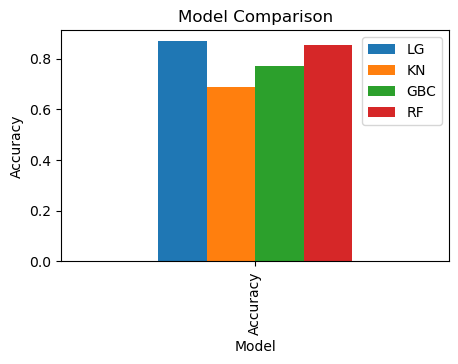

In [50]:
model_comp.plot(kind='bar',figsize=(5,3),label=False) # Need to figure out how to remove accuracy from bottom
plt.legend(['LG','KN','GBC','RF'])
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

***
***
# `Evaluating the Model`
***
***

### `HyperParameter Tunning`

## `KNN Tune`
***`By Hand`***

In [51]:
train_score = []
test_score = []

# Create a list of different values from Nnegihbors
neighbors = range(1,21)

# Instance of KNeighbors
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the model
    knn.fit(x_train,y_train)
    # Update the training score list
    train_score.append(knn.score(x_train,y_train))
    # Update the testing score list
    test_score.append(knn.score(x_test,y_test))

In [52]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [53]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

***`Visculize it`***

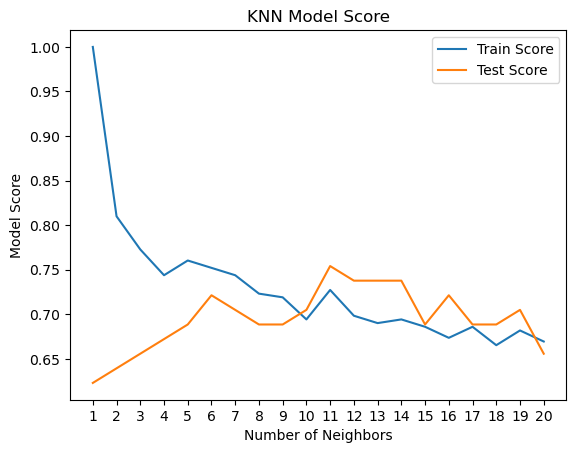

In [54]:
plt.plot(neighbors,train_score,label='Train Score')
plt.plot(neighbors,test_score,label='Test Score')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1,21,1))
plt.title("KNN Model Score")
plt.show()

#### `Tune another parameter by setting n_neighbor=14`

In [55]:
train_score = []
test_score = []

# Create a list of different values from Nnegihbors
p = range(-2,1)

# Instance of KNeighbors
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    knn.set_params(p=i,n_neighbors=11)
    # Fit the model
    knn.fit(x_train,y_train)
    # Update the training score list
    train_score.append(knn.score(x_train,y_train))
    # Update the testing score list
    test_score.append(knn.score(x_test,y_test))

In [56]:
train_score

[0.7272727272727273,
 0.7272727272727273,
 0.7024793388429752,
 0.6859504132231405,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281]

In [57]:
test_score

[0.7704918032786885,
 0.7540983606557377,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853]

***`Visculize it`***

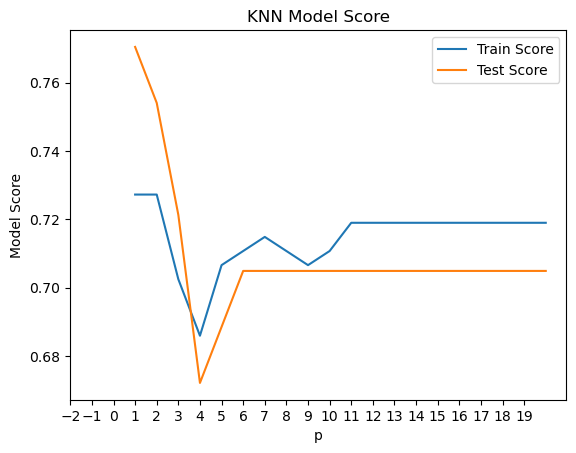

In [58]:
plt.plot(neighbors,train_score,label='Train Score')
plt.plot(neighbors,test_score,label='Test Score')
plt.legend()
plt.xlabel("p")
plt.ylabel("Model Score")
plt.xticks(np.arange(-2,20))
plt.title("KNN Model Score")
plt.show()

## `LogisticRegression Tune`

***`Automatically, By RandomizedSearchCV`***

***Setup Grid***

In [59]:
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear','newton-cg'],
                
               }

rf_grid = {
    'n_estimators':np.arange(10,1000,10),
    'max_depth':[None,3,5,7],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

gbc_grid =  {
    'n_estimators':np.arange(10,1000,10),
    'max_depth':[None,3,5,7],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

***Tune Model***

`Tune Logistic Regression`

In [60]:
np.random.seed(42)

`Setup random hyperperameter for logistic regression`

In [61]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

`Fit random hyperperameter for logistic regression`

In [62]:
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg']},
                   verbose=True)

`Finding best hyperperameter for logistic regression`

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

**`Score it`**

In [64]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

*`Tune RandomForest Classifier`*

In [65]:
np.random.seed(42)

In [66]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

`Fit random hyperperameter for Random Forest`

In [67]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

`Finding Best Hyper Perameter`

In [68]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': None}

**`Score it`**

In [69]:
rs_rf.score(x_test,y_test)

0.8688524590163934

`Tune Gradient Booster`

In [70]:
np.random.seed(42)
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier(),
                               param_distributions=gbc_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

`Fit Gradient Booster`

In [71]:
rs_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=Tr

`Finding Best Hyper Perameter`

In [72]:
rs_gbc.best_params_

{'n_estimators': 690,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 5}

**`Score it`**

In [73]:
rs_gbc.score(x_test,y_test)

0.8524590163934426

### `Tune Logistic Regression with Grid Search CV`

In [74]:
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

In [75]:
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'newton-cg']},
             verbose=True)

In [76]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [77]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [78]:
model_score

{'logisticRegression': 0.8688524590163934,
 'KNeighbord': 0.6885245901639344,
 'gbc': 0.7704918032786885,
 'randomForest': 0.8524590163934426}

### `Evaluate model with`
* ROC Curve and AUC score
* Accuracy Score
* Confusion Matrix
* Precission
* Recall
* F1 Score
* Classification Report`

***`Prediction`***

In [79]:
y_pred = gs_log_reg.predict(x_test)

***`Display pred in dataframe`***

In [80]:
AvsP = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
},columns=['Actual','Predict'])

In [81]:
AvsP.tail(5)

,Actual,Predict
249,0,0
104,1,1
300,0,0
193,0,0
184,0,0


***`Plot ROC Curve`***

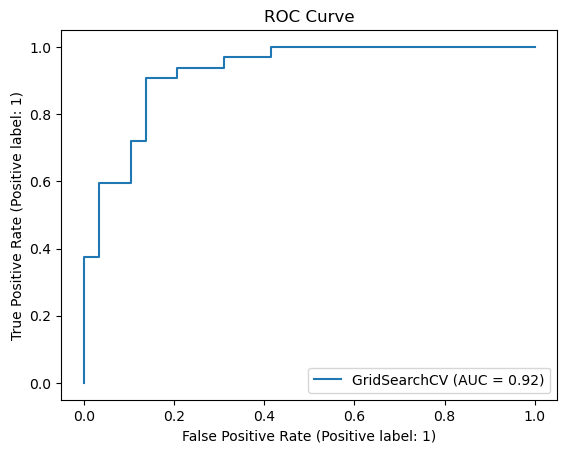

In [82]:
plot_roc_curve(gs_log_reg,x_test,y_test)
plt.title("ROC Curve")
plt.show()

***`Confusion Matrix`***

In [83]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

***`Visculize it`***

In [84]:
def plot_confusion_matrix(matrix):
    '''
    Print Nice Looking Confusion Matrix
    '''
    sns.set(font_scale=1.5)
    plt.figure(figsize=(3,3))
    sns.heatmap(matrix,cbar=False,annot=True,linewidths=1.5)
    plt.title("Confusion Matrix")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.show()

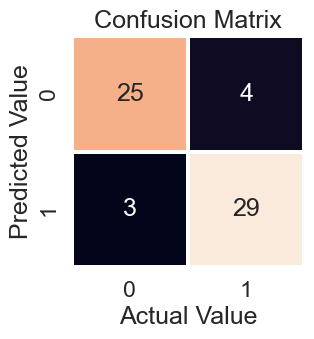

In [85]:
plot_confusion_matrix(con_matrix)

***`Classification Report`***

In [86]:
c_report = classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



***`Cross Validation`***

In [87]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [88]:
clf = LogisticRegression(C = 0.23357214690901212,solver = 'liblinear')

In [89]:
# accuracy
c_ar = cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='accuracy')
c_ar = np.mean(c_ar)
c_ar

0.8479781420765027

In [90]:
# Precission
precision = cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='precision')
precision = np.mean(precision)
precision

0.8215873015873015

In [91]:
# recall
recall = cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='recall')
recall = np.mean(recall)
recall

0.9272727272727274

In [92]:
# f1
f1 = cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='f1')
f1 = np.mean(f1)
f1

0.8705403543192143

***`Visculize cross validation matrix`***

In [93]:
cv_metrix = pd.DataFrame({
    'Accuracy':c_ar,
    'Precision':precision,
    'Recall':recall,
    'F1 Score':f1
},index=[0])

In [94]:
cv_metrix

,Accuracy,Precision,Recall,F1 Score
0,0.847978,0.821587,0.927273,0.87054


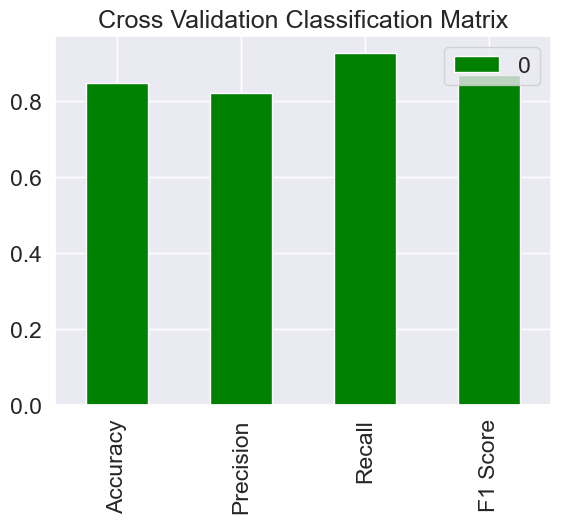

In [95]:
cv_metrix.T.plot.bar(color='green',title='Cross Validation Classification Matrix')
plt.show()

***
# `Features Importance`
****

***`Check Coeficient of logistic model`***

In [100]:
model = LogisticRegression()
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**`Model coeficient`**

In [101]:
model.coef_

array([[ 0.01130449, -1.23546962,  0.78514232, -0.01160339, -0.00203054,
        -0.00176605,  0.5542193 ,  0.02786314, -0.85133355, -0.68488277,
         0.6367315 , -0.75899933, -1.03686826]])

**`Match coeficient to columns`**

In [102]:
coef_dict = dict(zip(df.columns,model.coef_[0]))

**`Display dict`**

In [103]:
coef_dict

{'age': 0.011304486858455285,
 'sex': -1.2354696161590242,
 'cp': 0.7851423154442054,
 'trestbps': -0.011603388329904742,
 'chol': -0.002030543978828024,
 'fbs': -0.001766052787268017,
 'restecg': 0.5542193001600025,
 'thalach': 0.027863142082724633,
 'exang': -0.8513335463479861,
 'oldpeak': -0.6848827680203884,
 'slope': 0.6367314957253445,
 'ca': -0.7589993305076379,
 'thal': -1.036868261770218}

**`Convert it into DataFrame`**

In [104]:
coef_frame = pd.DataFrame(coef_dict,index=[0])

In [106]:
coef_frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.011304,-1.23547,0.785142,-0.011603,-0.002031,-0.001766,0.554219,0.027863,-0.851334,-0.684883,0.636731,-0.758999,-1.036868


**`Visculize it`**

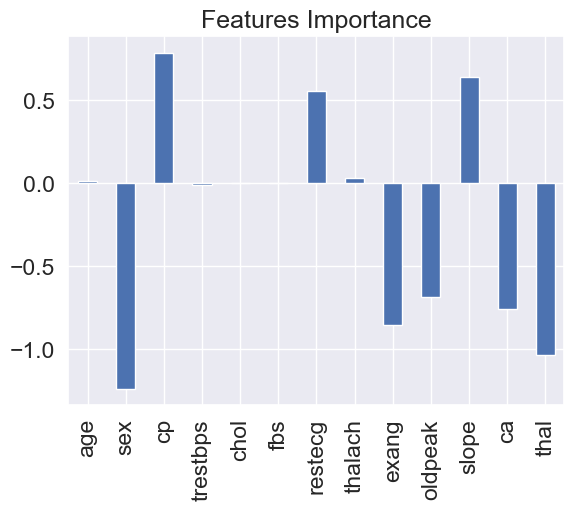

In [107]:
coef_frame.T.plot.bar(title="Features Importance",legend=False)
plt.show()

### `Let's Prove It`

**`Sex and Target`**

In [108]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


**`Slope and Target`**

In [109]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


***`cp and Target`***

In [110]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
